In [1]:
## Tratamento de Dados

In [2]:
%pip install seaborn scikit-learn missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
import missingno as msno # type: ignore
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
df.shape

(7043, 21)

<Axes: >

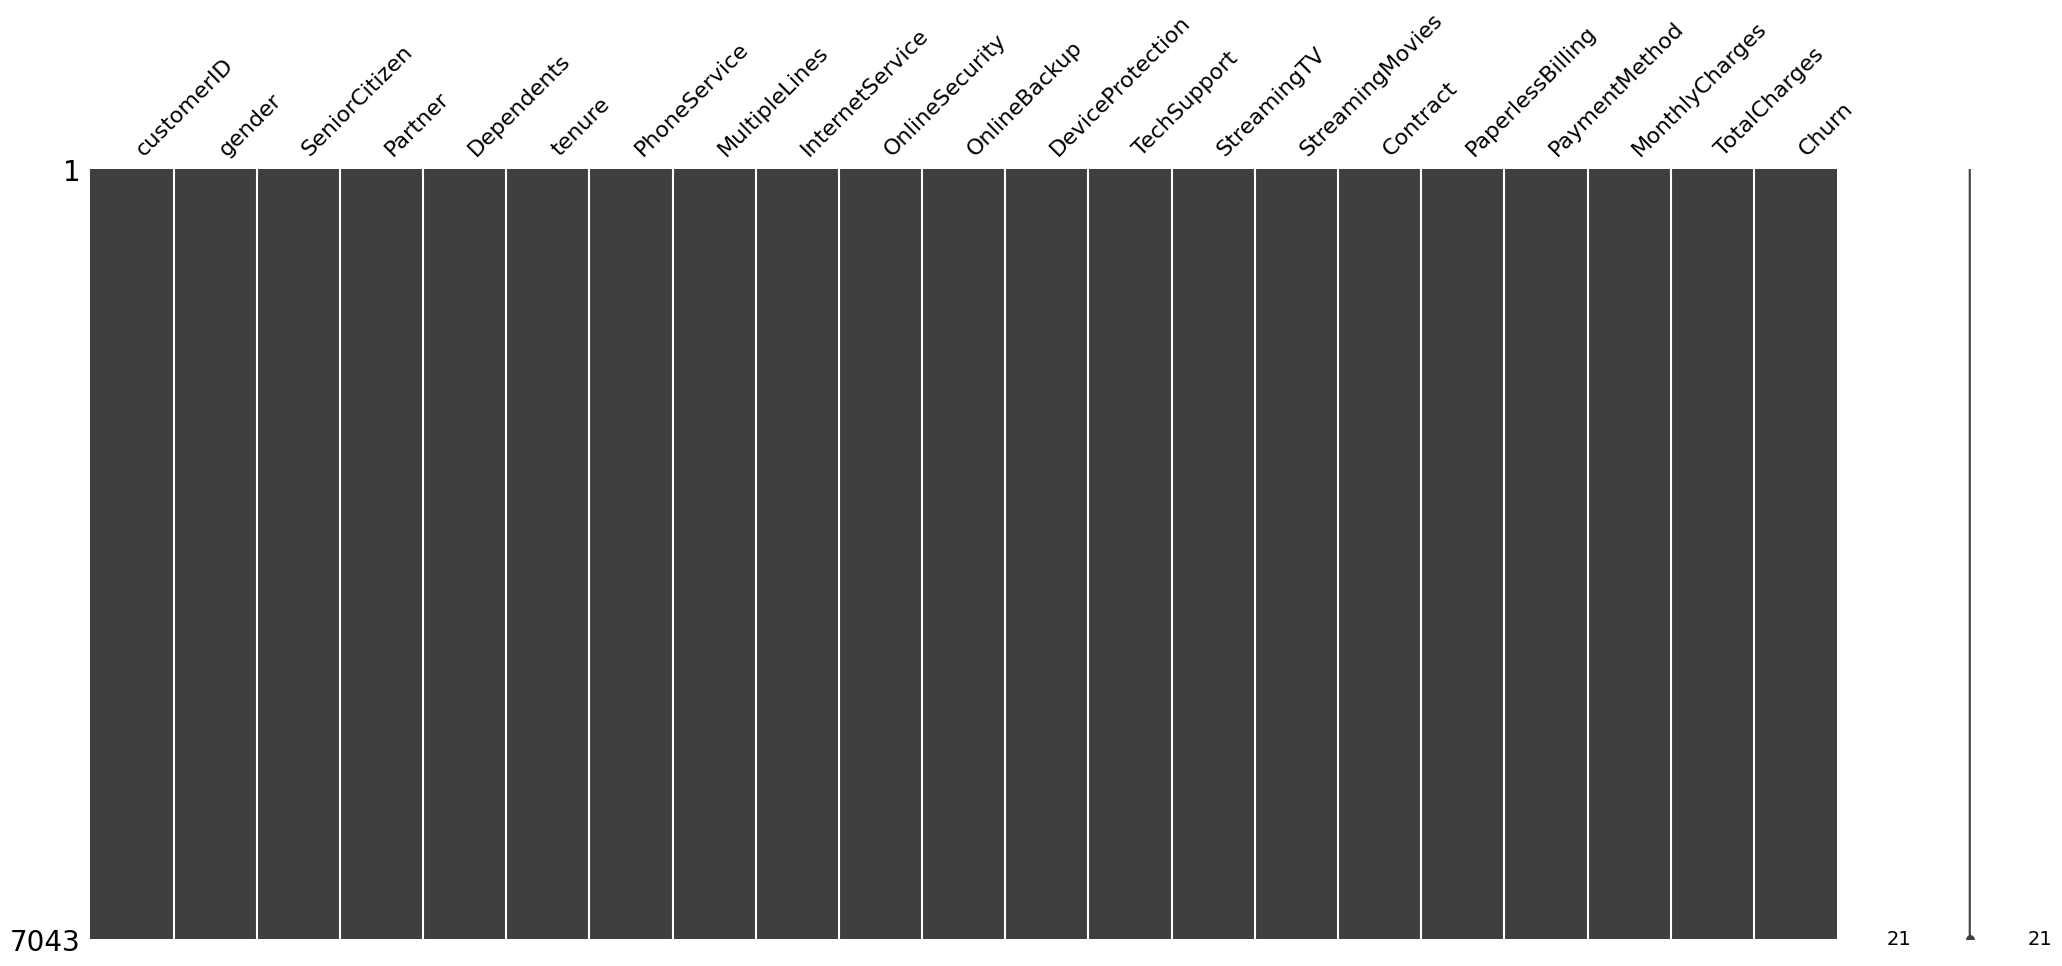

In [6]:
msno.matrix(df)

In [7]:
df.drop('customerID', axis=1, inplace=True)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:

df[["tenure", "MonthlyCharges"]][np.isnan(df['TotalCharges'])]

,tenure,MonthlyCharges
488,0,52.55
753,0,20.25
936,0,80.85
1082,0,25.75
1340,0,56.05
3331,0,19.85
3826,0,25.35
4380,0,20.00
5218,0,19.70
6670,0,73.35


In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index


Index([], dtype='int64')

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
def analyze_all_nans(df):
    """Analisa todos os valores NaN no dataset"""
    
    # Contagem de NaN por coluna
    nan_counts = df.isnull().sum()
    
    # Filtra apenas colunas que têm NaN
    nan_counts = nan_counts[nan_counts > 0]
    
    # Calcula percentuais
    nan_percentages = (nan_counts / len(df)) * 100
    
    # Cria um DataFrame com os resultados
    nan_summary = pd.DataFrame({
        'Contagem de NaN': nan_counts,
        'Percentual (%)': nan_percentages
    })
    
    print("=== Análise de Valores Ausentes ===")
    print(f"\nTotal de linhas no dataset: {len(df)}")
    print(f"Colunas com valores ausentes: {len(nan_counts)}")
    print("\nDetalhamento por coluna:")
    print(nan_summary)
    
    return nan_summary

# Usar a função
analyze_all_nans(df)

=== Análise de Valores Ausentes ===

Total de linhas no dataset: 7032
Colunas com valores ausentes: 0

Detalhamento por coluna:
Empty DataFrame
Columns: [Contagem de NaN, Percentual (%)]
Index: []


,Contagem de NaN,Percentual (%)


In [13]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['PaymentMethod', 'InternetService', 'MultipleLines']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_transformed = pd.DataFrame(
    encoder.fit_transform(df[cols_to_encode]),
    columns=encoder.get_feature_names_out(cols_to_encode)
)
df.drop(columns=cols_to_encode, inplace=True)
df = pd.concat([df, df_transformed], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Female,No,Yes,No,1.0,No,No,Yes,No,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Male,No,No,No,34.0,Yes,Yes,No,Yes,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Male,No,No,No,2.0,Yes,Yes,Yes,No,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Male,No,No,No,45.0,No,Yes,No,Yes,Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Female,No,No,No,2.0,Yes,No,No,No,No,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Female,No,Yes,No,1.0,No,No,Yes,No,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Male,No,No,No,34.0,Yes,Yes,No,Yes,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Male,No,No,No,2.0,Yes,Yes,Yes,No,No,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Male,No,No,No,45.0,No,Yes,No,Yes,Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Female,No,No,No,2.0,Yes,No,No,No,No,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df_encoded = df.apply(lambda x: object_to_int(x))
df_encoded.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,1.0,0,0,2,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34.0,1,2,0,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,2.0,1,2,2,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45.0,0,2,0,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,2.0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
df_encoded.dropna(inplace=True)
df_encoded.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
Contract                                   0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
InternetService_DSL                        0
InternetSe

In [18]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7021 non-null   int64  
 1   SeniorCitizen                            7021 non-null   int64  
 2   Partner                                  7021 non-null   int64  
 3   Dependents                               7021 non-null   int64  
 4   tenure                                   7021 non-null   float64
 5   PhoneService                             7021 non-null   int64  
 6   OnlineSecurity                           7021 non-null   int64  
 7   OnlineBackup                             7021 non-null   int64  
 8   DeviceProtection                         7021 non-null   int64  
 9   TechSupport                              7021 non-null   int64  
 10  StreamingTV                              7021 non-nul

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print(df_encoded[numeric_features].head())

     tenure  MonthlyCharges  TotalCharges
0 -1.280348       -1.161126     -0.994264
1  0.064487       -0.260407     -0.173494
2 -1.239595       -0.363441     -0.959706
3  0.512765       -0.747327     -0.195010
4 -1.239595        0.196600     -0.940506


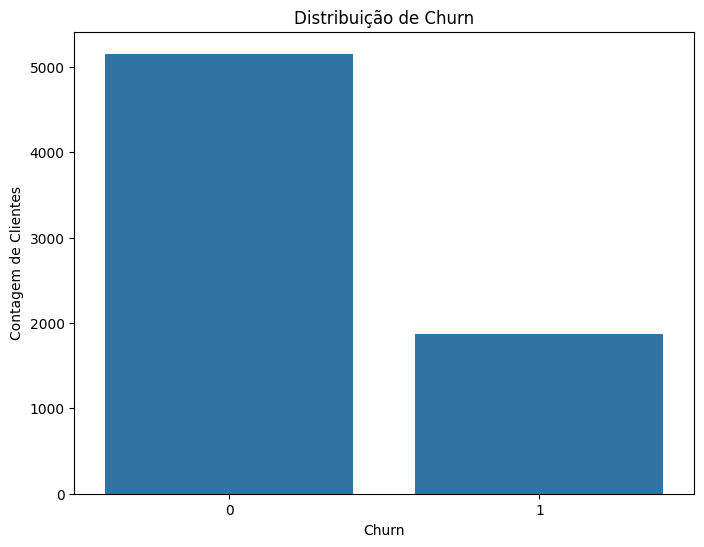

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem de Clientes')
plt.show()

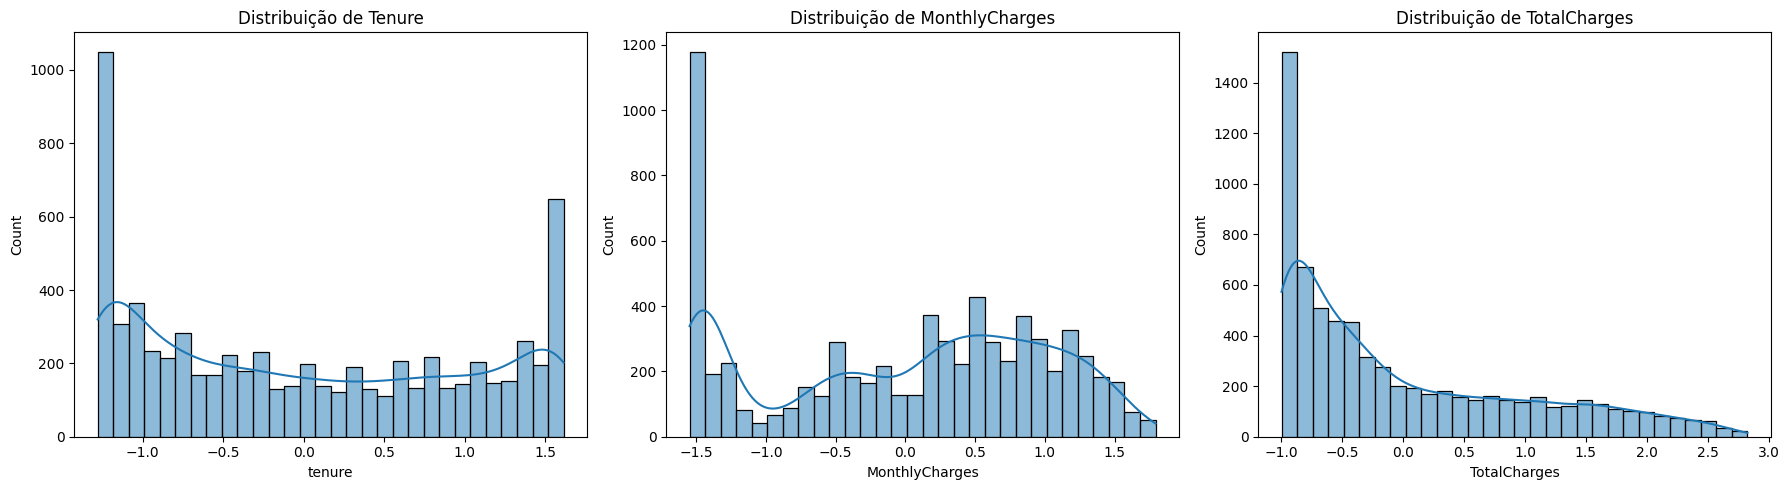

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_encoded['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribuição de Tenure')
sns.histplot(df_encoded['MonthlyCharges'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribuição de MonthlyCharges')
sns.histplot(df_encoded['TotalCharges'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribuição de TotalCharges')
plt.tight_layout()
plt.show()

In [22]:
sns.histplot(df_encoded['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribuição de Tenure')
sns.histplot(df_encoded['MonthlyCharges'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribuição de MonthlyCharges')
sns.histplot(df_encoded['TotalCharges'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribuição de TotalCharges')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

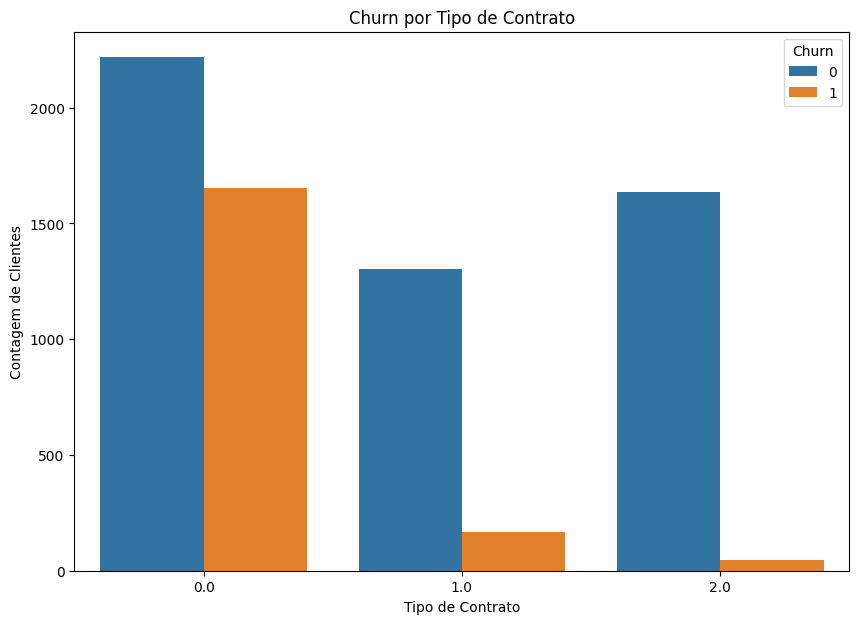

In [23]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Contract', hue='Churn', data=df_encoded)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem de Clientes')
plt.show()

In [24]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,-1.280348,0,0,2,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.064487,1,2,0,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,-1.239595,1,2,2,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0.512765,0,2,0,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,-1.239595,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


--- Resultados do Random Forest ---
Acurácia: 0.8000

Matriz de Confusão:
[[947 114]
 [167 177]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.51      0.56       344

    accuracy                           0.80      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405


Média da validação cruzada: 0.8002 (+/- 0.0239)


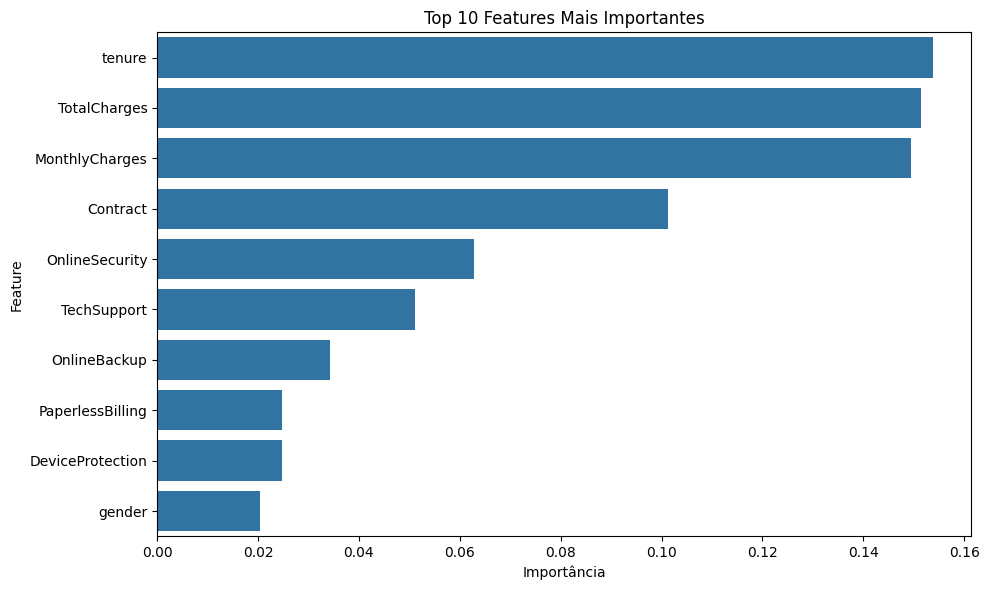

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='log2', class_weight=None) 

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("--- Resultados do Random Forest ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\nMédia da validação cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Features Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


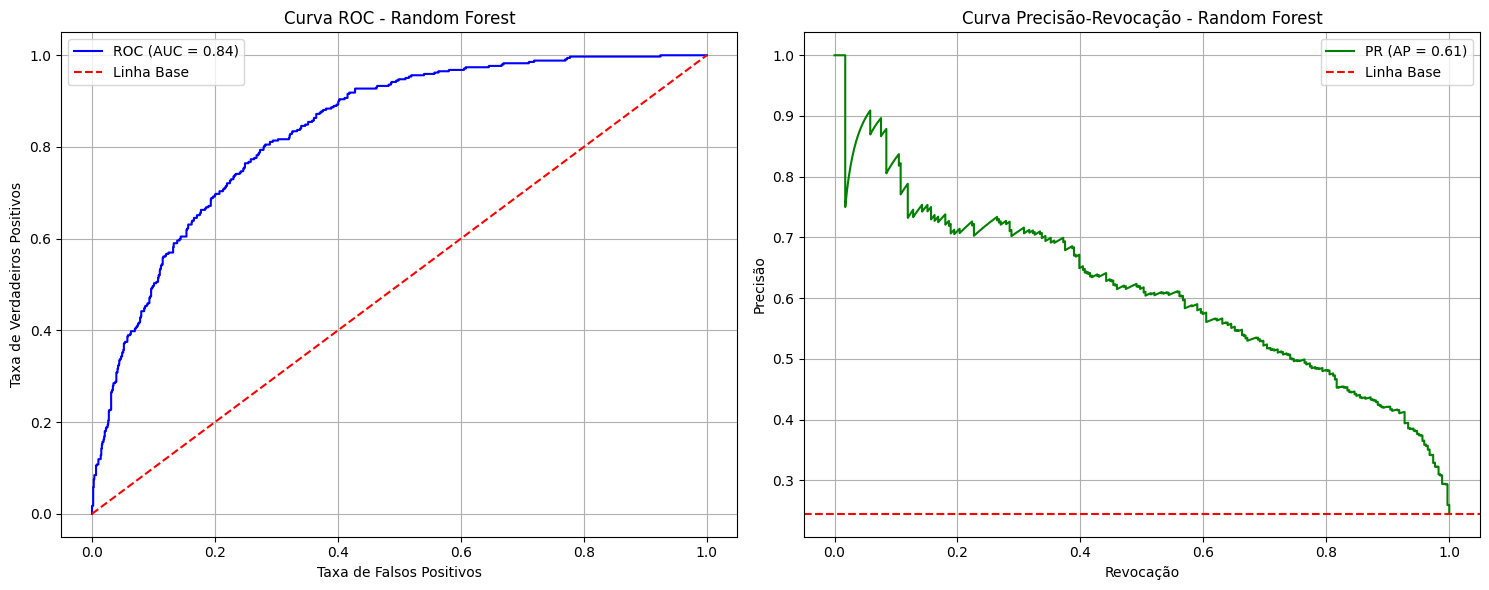

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr_rf, tpr_rf)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
avg_precision = average_precision_score(y_test, y_prob_rf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Curva ROC
ax1.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], 'r--', label='Linha Base')
ax1.set_xlabel('Taxa de Falsos Positivos')
ax1.set_ylabel('Taxa de Verdadeiros Positivos')
ax1.set_title('Curva ROC - Random Forest')
ax1.legend()
ax1.grid(True)

# Curva Precisão-Revocação
ax2.plot(recall_rf, precision_rf, color='green', label=f'PR (AP = {avg_precision:.2f})')
ax2.axhline(y=sum(y_test)/len(y_test), color='r', linestyle='--', label='Linha Base')
ax2.set_xlabel('Revocação')
ax2.set_ylabel('Precisão')
ax2.set_title('Curva Precisão-Revocação - Random Forest')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

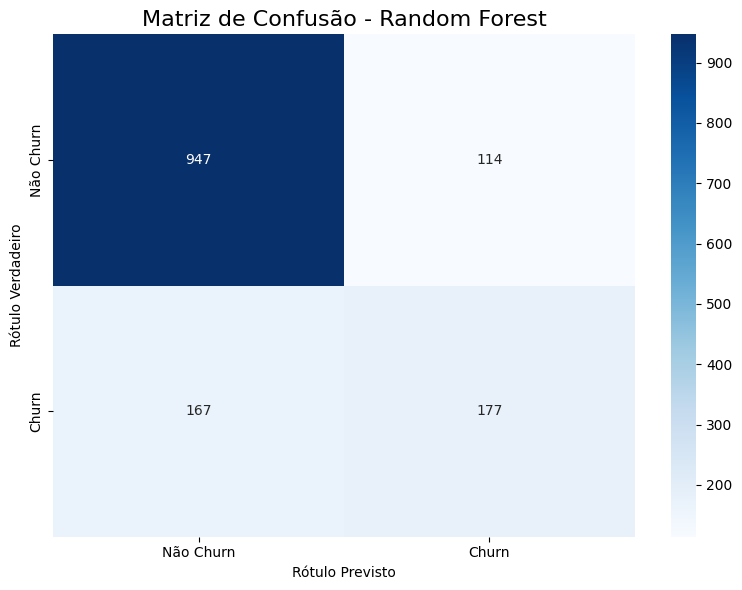


Métricas detalhadas:
Verdadeiros Negativos (TN): 947
Falsos Positivos (FP): 114
Falsos Negativos (FN): 167
Verdadeiros Positivos (TP): 177
Taxa de Falsos Positivos: 0.1074
Taxa de Falsos Negativos: 0.4855


In [27]:
#Matriz de Confusão e Métricas Detalhadas
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm_rf.ravel()
print("\nMétricas detalhadas:")
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (TP): {tp}")
print(f"Taxa de Falsos Positivos: {fp/(fp+tn):.4f}")
print(f"Taxa de Falsos Negativos: {fn/(fn+tp):.4f}")

In [28]:
from sklearn.impute import SimpleImputer

# Criar o imputer
imputer = SimpleImputer(strategy='mean')

# Aplicar o imputer aos dados
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [29]:
## Implementação de Algoritmos de Regressão e Classificação

### Regressão Logística

from sklearn.linear_model import LogisticRegression
X = df_encoded.drop('Churn', axis=1)  # Todas as colunas exceto 'Churn'
y = df_encoded['Churn']  # Apenas a coluna 'Churn'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("--- Resultados da Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))


### Redes Bayesianas
from sklearn.naive_bayes import GaussianNB

#### Criar e treinar o modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#### Fazer previsões no conjunto de teste
y_pred_gnb = gnb.predict(X_test)

# Avaliar o desempenho do modelo
print("\n--- Resultados do Gaussian Naive Bayes ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_gnb):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_gnb))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_gnb))

--- Resultados da Regressão Logística ---
Acurácia: 0.8100

Matriz de Confusão:
[[930 131]
 [136 208]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1061
           1       0.61      0.60      0.61       344

    accuracy                           0.81      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.81      0.81      0.81      1405


--- Resultados do Gaussian Naive Bayes ---
Acurácia: 0.7317

Matriz de Confusão:
[[764 297]
 [ 80 264]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1061
           1       0.47      0.77      0.58       344

    accuracy                           0.73      1405
   macro avg       0.69      0.74      0.69      1405
weighted avg       0.80      0.73      0.75      1405



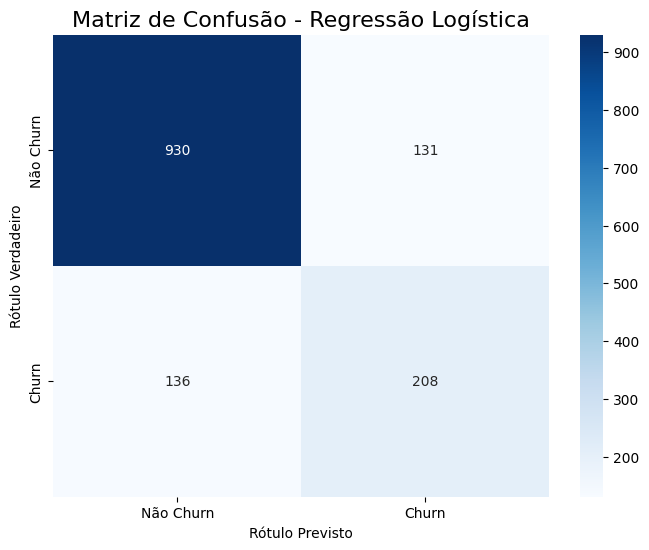

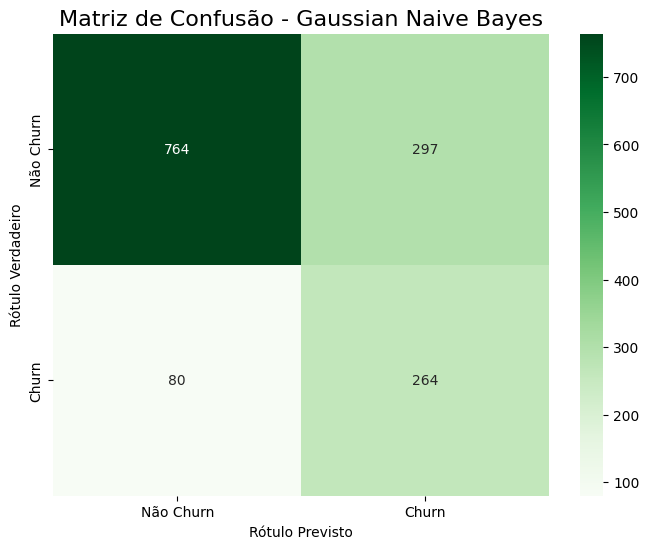

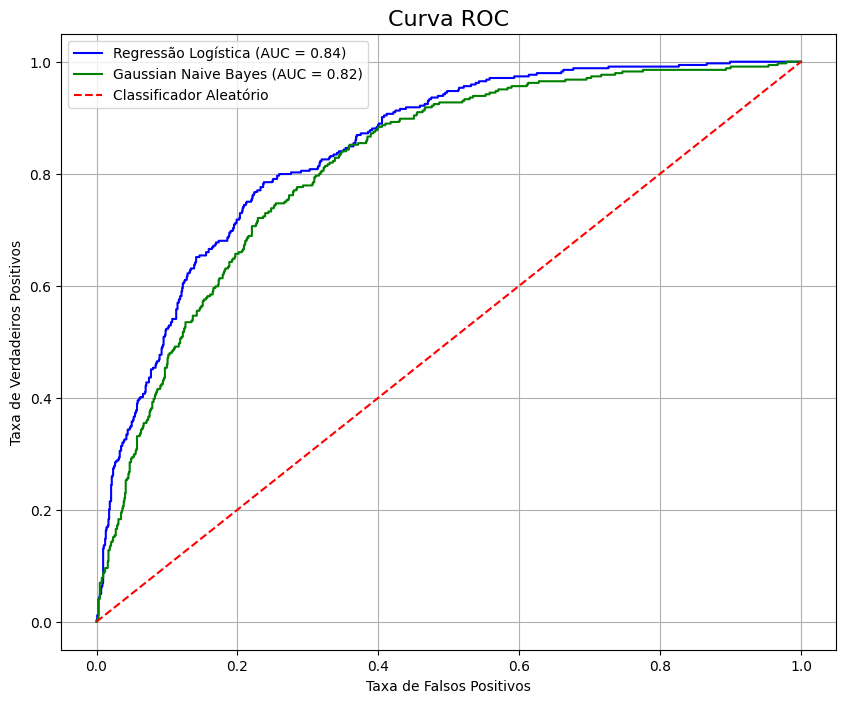

In [30]:
## Gráficos de desempenho

### Matriz de Confusão - Regressão Logística

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

### Matriz de Confusão - Gaussian Naive Bayes

cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Gaussian Naive Bayes', fontsize=16)
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()


### Gráfico da Curva ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
auc_gnb = roc_auc_score(y_test, y_prob_gnb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Regressão Logística (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', label=f'Gaussian Naive Bayes (AUC = {auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Classificador Aleatório')

plt.title('Curva ROC', fontsize=16)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.grid(True)
plt.show()